In [1]:
# import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Fraud Detection

This work corresponds the solution of the problem of the credict card fraud detection, where we need to indentify what are fraud and the reason behind of theses frauds, for this we will use a different approach like 

- Logistic Regression
- SVM
- Random Forest 
- Decision Tree
- Xgboost


First of all, we need to know how unbalanced are the data, for this we will calculated the number of fraud over the total number of transactions
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

https://www.kaggle.com/code/pileatedperch/detecting-fraud-with-random-forest-mcc-0-869/notebook


# Getting started



In [2]:
df=pd.read_csv(r"D:\jnka1\UDEC\Proyectos_Portafolio\Credict card Fraud Detection\creditcard\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#We look for null values
df.isnull().any().any()

False

In [5]:
# Now we look for the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
# we Count the number of classes that exist in the data
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [8]:
# now we normalize these numbers and we notice that 
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

We only have the 0.1727% of the transaction with fraud

# 3 Train/Test Split 
For this section we will change the df datav , to do this we create the variable X and Y 

In [9]:
x= df.drop(labels='Class', axis=1)
y= df.loc[:,'Class']
del df

we'll use a test size of 20%. We also stratify the split on the repsonse variable, wich is very important to do because thera are so few fraudulent transactions

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y)

In [12]:
X_train.shape

(213605, 30)

In [13]:
X_test.shape

(71202, 30)

# 4 Exploration of data 
Now we will plot some of the data to see the main characteristic of the data

In [14]:
X_train.Time.describe()

count    213605.000000
mean      94680.096824
std       47528.413321
min           0.000000
25%       54074.000000
50%       84582.000000
75%      139254.000000
max      172792.000000
Name: Time, dtype: float64

In [15]:
# we convert the time in hours for an easy visualization

X_train.loc[:,'Time']= X_train.Time/3600
X_test.loc[:,'Time']= X_test.Time /3600


C:\Users\jnka1\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [16]:
X_train.Time.max()/24

1.9999074074074075

Text(0.5, 1.0, 'Transaction Times')

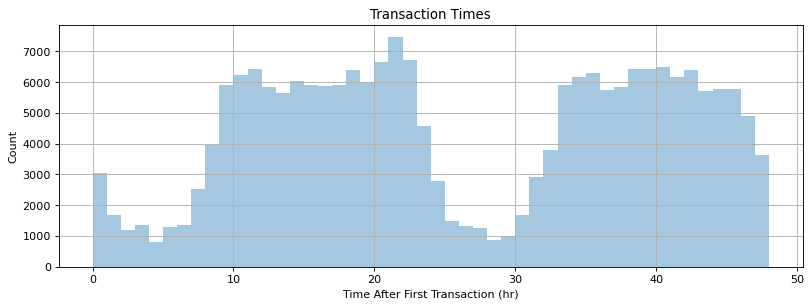

In [17]:
# We 'll plot the transaction'
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
# plt.xlim([0,48])
# plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.grid()
plt.title('Transaction Times')

We see that exist a bult of transaction in the nigth and we need to identify who did theses transactions and the favtor that cna affected this actions 

# 4.2 Amount

Summary statistics


In [18]:
X_train['Amount'].describe()

count    213605.000000
mean         88.566974
std         247.877691
min           0.000000
25%           5.560000
50%          22.000000
75%          77.900000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

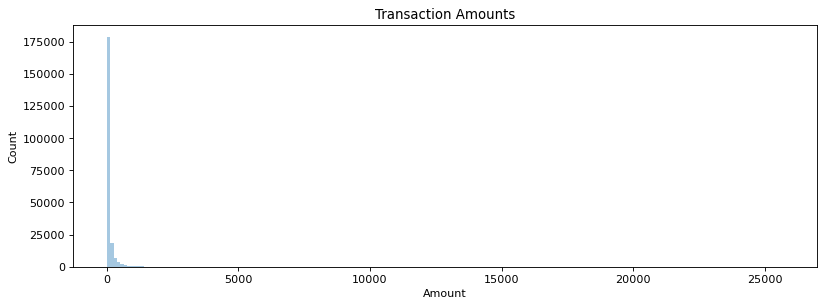

In [19]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=200, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

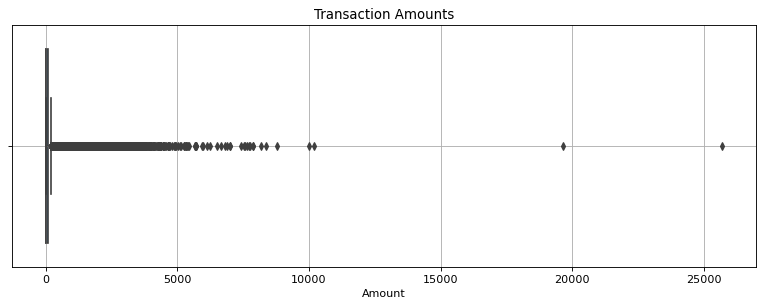

In [20]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')
plt.grid()

In [21]:
# We can calculate the skewness to be sure:
X_train['Amount'].skew()

16.75017840518476

That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution. We'll use the Box-Cox transform in SciPy, but some of the amounts are zero (min = 0 above), so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just  10−9 .

In [22]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

C:\Users\jnka1\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [23]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

The maximum likelihood estimate of  λ  in the Box-Cox transform:

In [24]:
maxlog

0.13426531803263794

The 99% confidence interval for  λ :

In [25]:
(min_ci, max_ci)

(0.132764031521523, 0.1357763924407392)

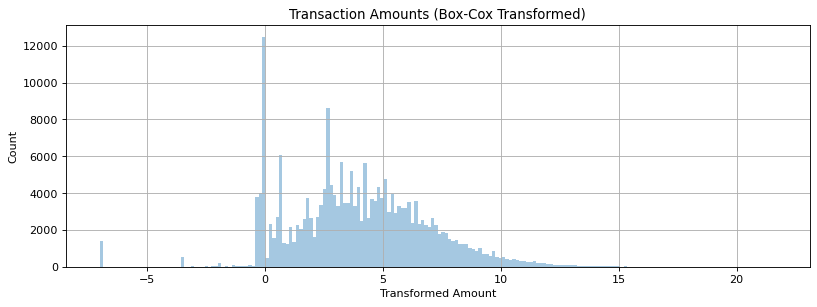

In [26]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=200, kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')
plt.grid()

Much better. The distribution appears to be bimodal, suggesting a divide between "small" and "large" purchases. Now let's check the descriptive stats of the transformed amounts:

In [27]:
X_train['Amount'].describe()

count    213605.000000
mean          3.984604
std           2.970058
min          -6.986996
25%           1.929275
50%           3.831226
75%           5.918140
max          21.667085
Name: Amount, dtype: float64

In [28]:
X_train['Amount'].skew()

0.11381831807916895

So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the  λ  value estimated on the training data.

In [29]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [30]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

## 4.3 Time vs Amount

Is there a relationship between the transaction amounts and the time of day? Let's explore this question with a joint histogram using hexagonal bins. For this plot, we convert each transaction time to the hour of the day on which it occurred.

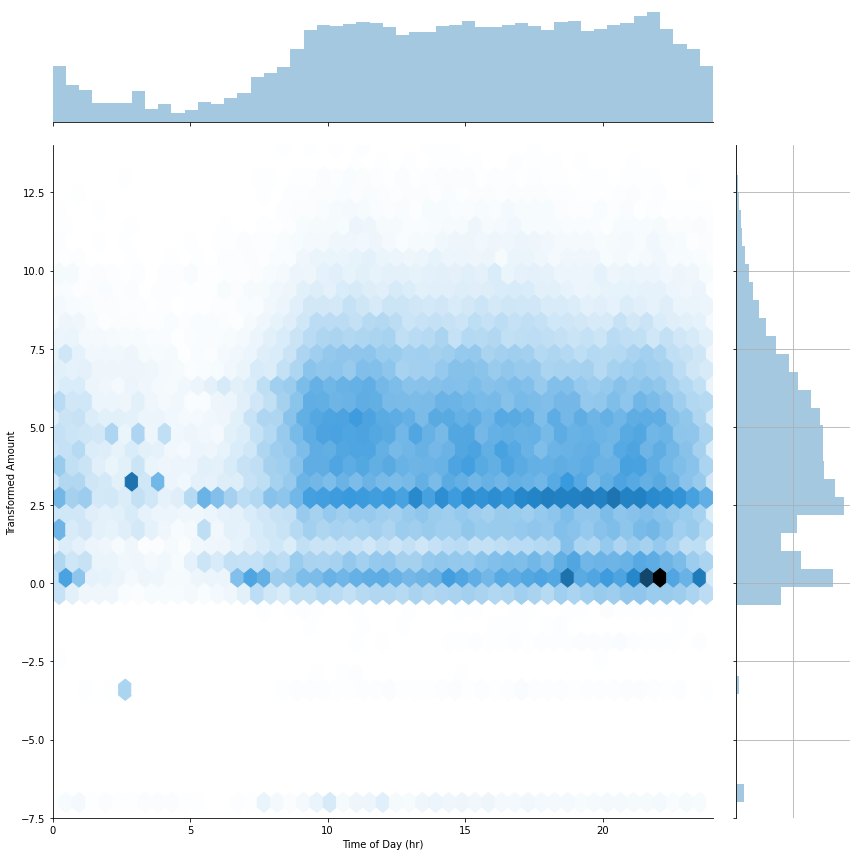

In [31]:

sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, height=12,
              xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')
plt.grid()

The transaction amounts appear to be similarly distributed throughout the daytime hours. However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

## 4.4 V1-V28

Compared the descriptive data ov the variable V1 to v28


In [32]:
pca_vars=['V%i' % k for k in range(1,29)]
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000
mean,0.001569,0.000002,0.002128,0.003253,-0.003121,0.002280,0.000174,0.000004,-0.000120,0.000024,...,-0.000122,-0.000535,0.000204,0.001702,0.000659,-0.000493,0.000262,-0.000466,0.000060,0.000025
std,1.949119,1.631565,1.513308,1.416402,1.383094,1.334311,1.242030,1.205131,1.096524,1.082799,...,0.815046,0.761421,0.735356,0.725300,0.618379,0.605833,0.521951,0.481924,0.403695,0.329708
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.921123,-0.600661,-0.888111,-0.844749,-0.693847,-0.766261,-0.554816,-0.207847,-0.642878,-0.534623,...,-0.456836,-0.211975,-0.227422,-0.540386,-0.162257,-0.354306,-0.317577,-0.327577,-0.070660,-0.052936
50%,0.018700,0.064062,0.180235,-0.017878,-0.055910,-0.271825,0.039377,0.022767,-0.052161,-0.091537,...,0.003942,-0.062856,-0.028883,0.008125,-0.011464,0.040768,0.017068,-0.052684,0.001549,0.011361
75%,1.315054,0.801725,1.027220,0.746481,0.610208,0.400528,0.568758,0.327720,0.595726,0.456034,...,0.459274,0.132691,0.186630,0.530105,0.147430,0.438400,0.351691,0.240480,0.091188,0.078410
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


Text(0, 0.5, 'Mean')

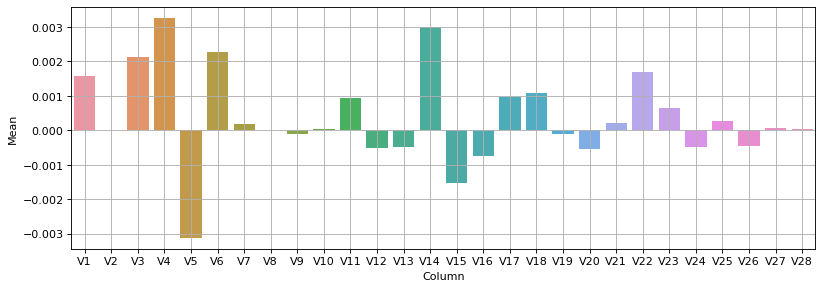

In [33]:
# lets plot mean of the variable

plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y = X_train[pca_vars].mean())
plt.grid()
plt.xlabel('Column')
plt.ylabel('Mean')

Text(0, 0.5, 'Mean')

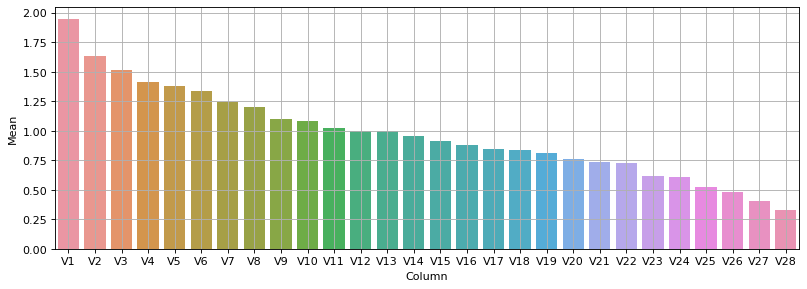

In [34]:

plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y = X_train[pca_vars].std())
plt.grid()
plt.xlabel('Column')
plt.ylabel('Mean')

Text(0, 0.5, 'Mean')

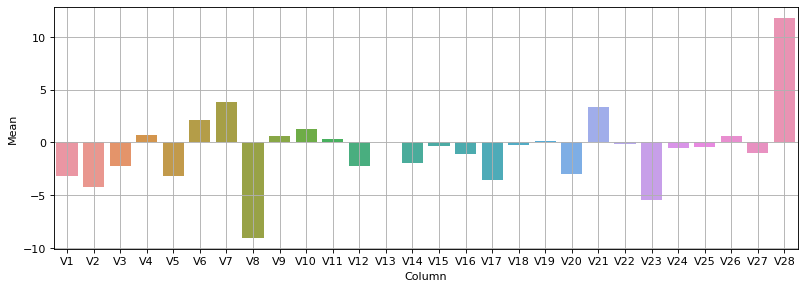

In [35]:
plt.figure(figsize=(12,4),dpi=80)
sns.barplot(x=pca_vars, y = X_train[pca_vars].skew())
plt.grid()
plt.xlabel('Column')
plt.ylabel('Mean')

Text(0, 0.5, 'Mean')

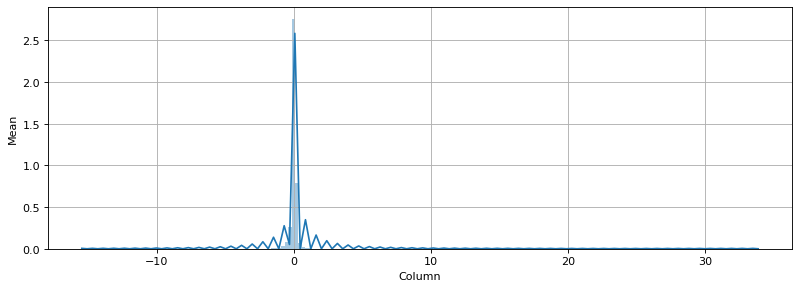

In [36]:
plt.figure(figsize=(12,4),dpi=80)
sns.distplot(X_train['V28'],bins=200)
plt.grid()
plt.xlabel('Column')
plt.ylabel('Mean')

Text(0.5, 1.0, 'V8')

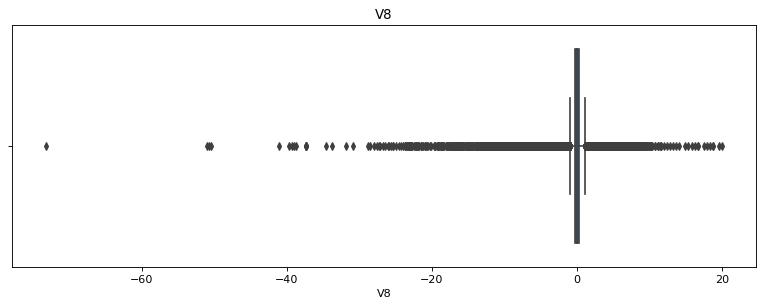

In [37]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in V8. This motivates us to plot the kurtoses of the PCA variables. The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

Text(0.5, 1.0, 'V1-V28 Kurtoses')

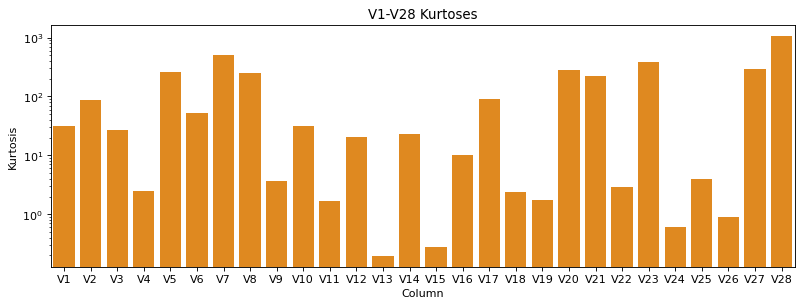

In [38]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

We've learned that many of the PCA variables are heavy-tailed. The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics. Let's plot the medians:

Text(0.5, 1.0, 'V1-V28 Medians')

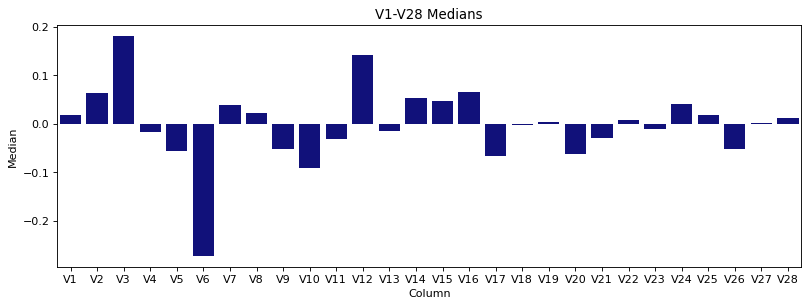

In [39]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5, 1.0, 'V1-V28 IQRs')

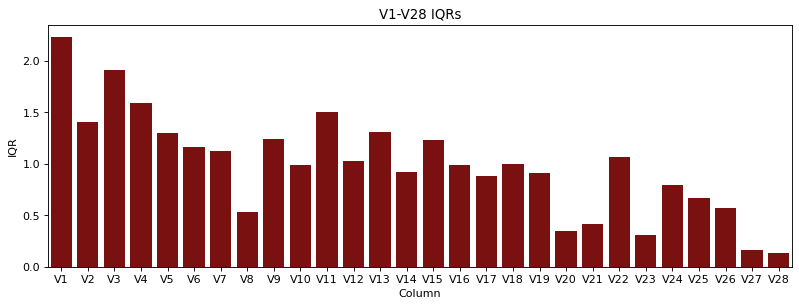

In [40]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [41]:
import seaborn as sns

# 5
Mutual information is a non-parametric method to estimate the mutual dependece between two variables. Mutual information of 0 indicates **NO** dependence, and  a higher value indicate a higher dependece. According to the @skelearn user guide, "mutual infotmation methods can capture any kinds of statical dependency, but being nonparametric, they require more smaples for accurate estimation". We have 227,845 training smaples, so mutual information should work well. Because the target variable is discrete we use mutual_info_classif (as opposed to mutual_info_regression for a continuous target).

In [42]:
from sklearn.feature_selection import mutual_info_classif

In [43]:
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

In [44]:
mutual_infos.sort_values(ascending=False)

V17       0.007934
V14       0.007827
V12       0.007215
V10       0.007208
V11       0.006466
V16       0.005723
V4        0.004670
V3        0.004585
V18       0.003887
V7        0.003818
V9        0.003802
V2        0.003013
V27       0.002198
V21       0.002194
V6        0.002157
V5        0.002145
V1        0.001802
V8        0.001739
Time      0.001712
V28       0.001668
Amount    0.001394
V19       0.001287
V20       0.000999
V23       0.000830
V24       0.000586
V26       0.000533
V22       0.000381
V25       0.000318
V13       0.000230
V15       0.000220
dtype: float64

the variables v17,V14,V12,V10,V11 are the five more correaletd variables with class

# 6 Modeling 
now we're ready to build machine learnineg models to predict whether a transaction is fraudulent. We'll train following models 

- Logistic Regression
- SVM
- Random Forest
- Decision Tree
- K-nn
- Xgboost

## 6.1 Logistic Regression and support vector Classifier

The class SGDClassififer implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes ''StandardScaler'' for data standarization( rescaling each variable to zero mean and unit variance)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier


This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

In [46]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

we'll conduct a grid search over several hyperparameter choices. The search use 5-folds cross validation with stratified folds. The type of linear classifier is chosen with the loos hyperparameter. For linear SVC we set los= 'hinge', and for logistic regression we set loss ='log'

wet the hyperparameter grids to search over one grid for the linear SVC and one for the logitic regrssion 

In [47]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridsearchCV, use StratifiedKfold with 5 folds for the train/validation splits. We'll use **matthews_corrcoef** as our scoring

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [49]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [50]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.2min finished


Means cross-validated MCC score of the best estimator found:


In [51]:
grid_sgd.best_score_

0.8001988062314863

This is a pretty good MCC score--- Random guessing has a score of 0, and a perfect predictor has a score of 1 Now chech the best hyperparameters found in the grid search 

In [52]:
grid_sgd.best_params_

{'model__alpha': 483.2930238571752,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

## 6.2 Random Forest 
Next we'll try random forest model, implemented in randomforestclassifier 

In [53]:
from sklearn.ensemble import RandomForestClassifier

We do not need to rescale the data tree-based models, so our pipeline will simply consist of the random forest model. We'll leave the pipeline implementation in place in case we watn to add preprocessing step in the future.

In [54]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes much longer to train on this fairly large dataset, so we don't actually do a hyperparameter grid search, only specifiying the number of estimator. We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future

In [55]:
param_grid_rf = {'model__n_estimators': [75]}

In [56]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [57]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [58]:
grid_rf.best_score_

0.8494782548519808

The random forest performed much better than the linear SVC---and without any hyperparameter tweaking!

In [59]:
grid_rf.best_params_

{'model__n_estimators': 75}

## 6.3  Decision Trees
Are non-parametric supervised learning method. The goal is to create a model that predicts th value of a target variable by learning simple decision rules inferred from the data features

In [60]:
from sklearn import tree
D_tree= tree.DecisionTreeClassifier(max_depth=4)
D_tree=D_tree.fit(X_train,y_train)


# 7 Test set evaluation of the best model 
According to the cross validated MCC scores the RF is the best performing model so now, let's evaluate its performance on the test set


In [61]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [62]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    dec=np.int64(np.log10(len(y_test)))
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm=confusion_matrix(y_test, y_pred)
    cm_display= ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if np.unique(y_test).all() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
        '''Ploteamos la curva ROC'''
        print("Curva Roc",'\n')
        fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=estimator.classes_[1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        plt.title('Roc Curve')
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))
    
    

CONFUSION MATRIX
[[71067    12]
 [   19   104]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     71079
           1     0.8966    0.8455    0.8703       123

    accuracy                         0.9996     71202
   macro avg     0.9481    0.9227    0.9350     71202
weighted avg     0.9996    0.9996    0.9996     71202

SCALAR METRICS
          MCC = 0.8704
        AUPRC = 0.8620
        AUROC = 0.9664
Curva Roc 

Cohen's kappa = 0.8701
     Accuracy = 0.9996


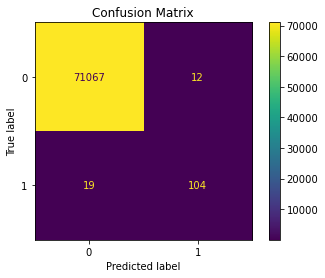

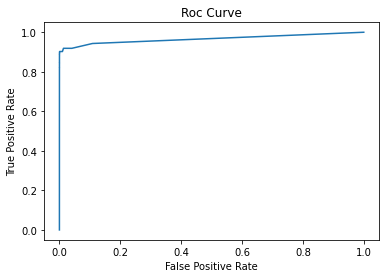

In [64]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[71063    16]
 [   15   108]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     71079
           1     0.8710    0.8780    0.8745       123

    accuracy                         0.9996     71202
   macro avg     0.9354    0.9389    0.9371     71202
weighted avg     0.9996    0.9996    0.9996     71202

SCALAR METRICS
          MCC = 0.8743
        AUPRC = 0.8251
        AUROC = 0.9746
Curva Roc 

Cohen's kappa = 0.8743
     Accuracy = 0.9996


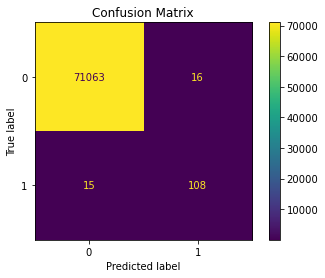

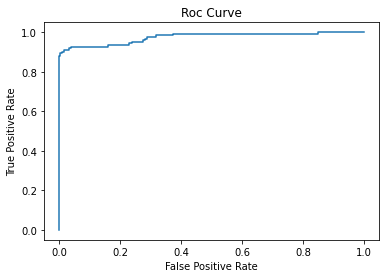

In [65]:
classification_eval(grid_sgd, X_test, y_test)

CONFUSION MATRIX
[[71063    16]
 [   30    93]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     71079
           1     0.8532    0.7561    0.8017       123

    accuracy                         0.9994     71202
   macro avg     0.9264    0.8779    0.9007     71202
weighted avg     0.9993    0.9994    0.9993     71202

SCALAR METRICS
          MCC = 0.8029
        AUPRC = 0.7544
        AUROC = 0.9389
Curva Roc 

Cohen's kappa = 0.8014
     Accuracy = 0.9994


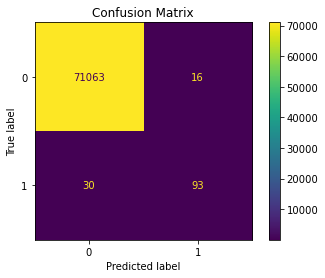

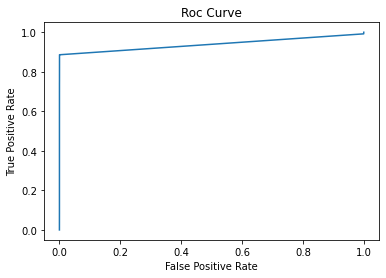

In [66]:
classification_eval(D_tree,X_test,y_test)

According to the MCC, the random forest performed better on the test set than on the training set. This is probably due to the refit model being trained on the entire training data set, and not on the smaller CV folds.

# 8 Conclusion 
